## Degradacion de la Bateria del Tesla Modelo S

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# Cargar los datos de la bateria de Tesla

data = pd.read_csv('../data/tesla-battery.csv')
print(data.shape)
data.head()

(99, 26)


,forumnaam,ID,firmwarerelease,gemiddeld verbruik (bin),batterijtype,batterijvermogen,datum invoer,firmwareversie,forumnaam (copy),leverdatum,...,gemiddeld verbruik,kmstand,kmstand berekening,kmstand bij vervanging batterij,kmstand huidige batterij,kmstand huidige batterij.1,Number of Records,percentage,rated range,typical range
0,RealNuke,76,NaN,270 Wh/km,NaN,85 kWh,1/15/15,V6.1,realnuke,NaN,...,270 Wh/km,32080,32080,0,"32,080 km",32080,1,95.00%,NaN,380 km
1,MisterGreen,101,NaN,NaN,NaN,85 kWh,2/2/15,NaN,mistergreen,NaN,...,NaN,50000,50000,0,"50,000 km",50000,1,96.50%,NaN,386 km
2,Go4IT,7,1.65.15,220 Wh/km,B,85 kWh,9/19/14,V6.0,go4it,9/10/13,...,220 Wh/km,67000,67000,0,"67,000 km",67000,1,96.30%,482.0,385 km
3,Go4IT,53,1.65.15,210 Wh/km,B,85 kWh,11/10/14,V6.0,go4it,9/10/13,...,218 Wh/km,73000,73000,0,"73,000 km",73000,1,94.80%,475.0,379 km
4,Go4IT,60,1.65.15,220 Wh/km,B,85 kWh,11/25/14,V6.0,go4it,9/10/13,...,220 Wh/km,74500,74500,0,"74,500 km",74500,1,95.00%,476.0,380 km


In [28]:
# Kilometraje Actual de la Bateria (formato 32,080 km)
X = data["kmstand huidige batterij"]

# Porcentaje del rango disponible (formato 95.00%)
y = data["percentage"]

#  ====  Otros datos para formato ====

# hay dos tipos de baterias 85kWh y 60kWh
potencia = data["batterijvermogen"]

In [29]:
# limpieza de datos
X = [int(re.sub("[^0-9]", "", a)) for a in X]
y = [int(re.sub("[^0-9]", "", b.split(".")[0])) for b in y]

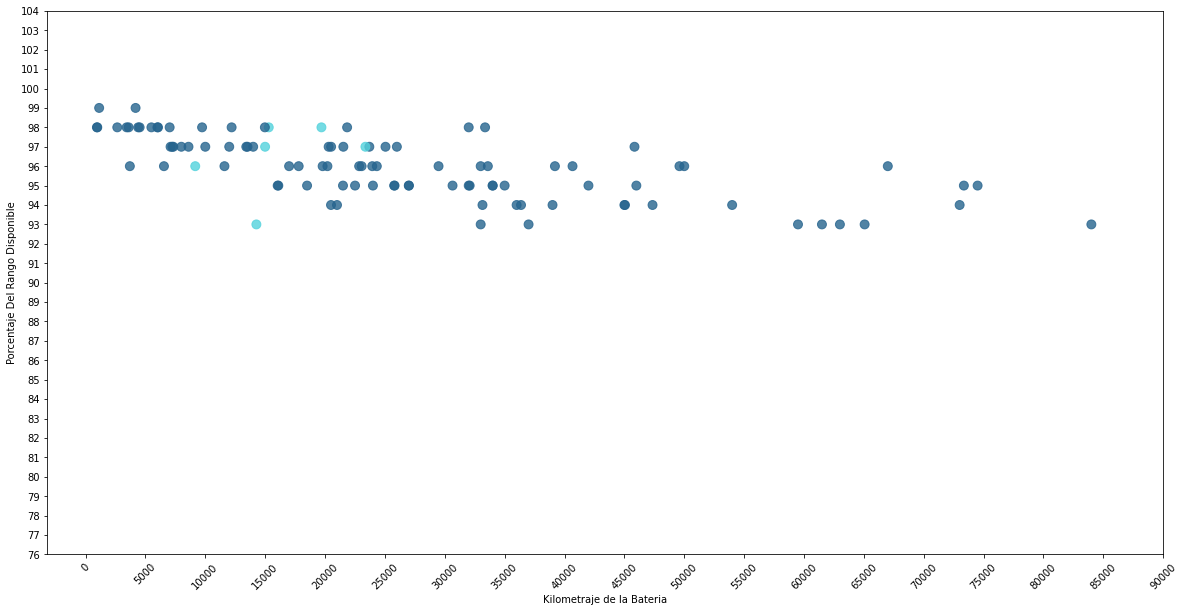

In [30]:
plt.figure(figsize=(20,10)) # tamano del cuadro

plt.title("")

potencia_colores = {'85 kWh':'#26648E', '60 kWh':'#53D2DC'}
colors = potencia.apply(lambda x: potencia_colores[x])

plt.scatter(X,y, c = colors, s = 80, alpha = 0.8)

plt.xlabel("Kilometraje de la Bateria")
plt.xticks(rotation=45) 
plt.xticks(np.arange(0, 95000, 5000.0))

plt.yticks(np.arange(76, 105, 1.0))
plt.ylabel("Porcentaje Del Rango Disponible")

plt.show()


## Ejercicio Opcional:

Utilice Sklearn para estimar un modelo que se ajuste a los datos recolectados.

- Calcule los coeficientes
- Estime el MSE
- Realice la prediccion del rango disponible (y) para una bateria con (x = 80,000 km y x = 140,000) y despliegue su prediccion en el grafico como un punto de color rojo.
- Para desplegar el grafico y el modelo **Utilize Plotly** no utilize matplotlib.

In [31]:
# 1. Estimacion de Coeficientes 

x_ = np.array(X).reshape(-1,1)
y_ = np.array(y).reshape(-1,1)

model = LinearRegression().fit(x_, y_)

b_1 = model.coef_[0]
b_0 = model.intercept_

print("b0:",b_0, "b1:", b_1)

b0: [97.46638223] b1: [-5.69854657e-05]


In [32]:
# 2. Estimacion del MSE

y_prima = model.predict(x_)

mse = mean_squared_error(y, y_prima)
print("MSE:",mse)

MSE: 1.3716775330804307


In [69]:
# 3. Prediccion de f(80,000)

x1 = 80000
y1 = model.predict([[x1]])

x2 = 140000
y2 = model.predict([[x2]])

In [122]:
# 4. Desplegar todos los datos + la prediccion como un punto rojo (2)

import numpy as np
import plotly.graph_objects as go


t = np.linspace(0, 10, 100)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=X, y=y,
    name='Datos',
    mode='markers',
    marker_color=colors
))

fig.add_trace(go.Scatter(x=X, y=y_prima.transpose()[0],
                    mode='lines',
                    name='Tendencia'))

fig.add_trace(go.Scatter(
    x=[x1], y=y1[0],
    name='80k',
    mode='markers',
    marker=dict(size=[15],color="green", symbol="star")
))

fig.add_trace(go.Scatter(
    x=[x2], y=y2[0],
    name='140k',
    mode='markers',
    marker=dict(size=[15],color="red", symbol="star")
))

fig.update_layout(yaxis=dict(range=[50,100]), title="Porcentaje Disponible de la Bateria del Tesla Modelo S")

fig.show()